In [2]:
# clean data func
import re
import gensim

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
def clean_data(val):
    "Remove chars that are not letters or numbers, downcase, then remove stop words"
    global cnt, lenght
    # print(val, lenght)
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    gensim.parsing.preprocessing.remove_stopwords(sentence)
    return sentence

/Users/alinakrivolapova/projects/my_ds_project/venv/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [89]:
# read and clean initial data
import pandas as pd

header_list = ["sentiment", "text"]
initial_data = pd.read_csv('./finantial_news_data.csv', names = header_list)
initial_data = initial_data.dropna(how="any")
initial_data['text'] = initial_data['text'].apply(clean_data)

# divide initial data to separate DataFrames
positive_news = []
negative_news = []
neutral_news = []

for index, element in initial_data.iterrows():
    if element['sentiment'] == 'positive':
        positive_news.append(element.values)
    elif element['sentiment'] == 'negative':
        negative_news.append(element.values)
    elif element['sentiment'] == 'neutral':
        neutral_news.append(element.values)

positive = pd.DataFrame(positive_news, columns=header_list)
negative = pd.DataFrame(negative_news, columns=header_list)
neutral = pd.DataFrame(neutral_news, columns=header_list)

In [90]:
neutral

,sentiment,text
0,neutral,according to gran the company has no plans to...
1,neutral,technopolis plans to develop in stages an area...
2,neutral,at the request of finnish media company alma m...
3,neutral,in sweden gallerix accumulated sek denominate...
4,neutral,the company supports its global customers in d...
...,...,...
2874,neutral,nevertheless the development can not be allow...
2875,neutral,besides as there is no depositor preference i...
2876,neutral,it holds 38 percent of outokumpu s shares and ...
2877,neutral,mobile communication and wireless broadband pr...


In [5]:
# save cleaned data
with open("./cleaned_initial_data.csv","w") as file:
    for x,y in zip(initial_data['sentiment'], initial_data['text']):
        file.writelines(','.join([x,y]) + '\n')

In [97]:
import numpy as np
# form balanced dataset
sample_size = min(positive.shape[0], negative.shape[0], neutral.shape[0])
raw_data = np.concatenate((positive['text'].values[:sample_size],
                           negative['text'].values[:sample_size],
                           neutral['text'].values[:sample_size]), axis=0)
labels = [2] * sample_size + [1] * sample_size + [0] * sample_size

In [103]:
# divide data to training & test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(raw_data, labels, test_size=0.2, random_state=1)

In [120]:
# filter real data
real_data = pd.read_csv('./mydump.csv', names = ["text"])
real_data
# cannot drop empty data because of empty column
#real_data = real_data.dropna(how="any")  
real_data['text'] = real_data['text'].apply(clean_data)
real_data

,text
0,elon musk moves in mysterious ways so it would...
1,the price of bitcoin hit a threeweek high on m...
2,the us securities watchdog told tesla last yea...
3,german police are investigating whether a fire...
4,the driver of a tesla car in a fatal crash tha...
...,...
139,spacex has completed its last big test of its ...
140,tesla shares have soared 40 in two days after ...
141,followers of elon musk are used to big claims ...
142,elon musks spaceships to mars can wait his tes...


In [130]:
# build corpus
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for sentence in real_data['text'].iteritems():
        word_list = sentence[1].split(" ")
        corpus.append(word_list)
            
    return corpus

corpus = build_corpus(real_data)

In [124]:
import logging
import multiprocessing
import time
import gensim
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

# https://habr.com/en/company/mailru/blog/417767/

# add logging to check errors during learning
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# use real data
#data = gensim.models.word2vec.LineSentence('mydump.csv')

# learning
# size of space 200, number of words in line 5, min frequency 3
#model = Word2Vec(data, vector_size=200, window=5, min_count=3, workers=multiprocessing.cpu_count())
model = Word2Vec(corpus, vector_size=200, window=5, min_count=3, workers=multiprocessing.cpu_count())
#model.save("model.w2v")

2021-07-07 22:01:33,967 : INFO : collecting all words and their counts
2021-07-07 22:01:33,968 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-07-07 22:01:33,989 : INFO : collected 14269 word types from a corpus of 103806 raw words and 144 sentences
2021-07-07 22:01:33,990 : INFO : Creating a fresh vocabulary
2021-07-07 22:01:34,015 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=3 retains 4118 unique words (28.859765926133576%% of original 14269, drops 10151)', 'datetime': '2021-07-07T22:01:34.015749', 'gensim': '4.0.1', 'python': '3.8.2 (v3.8.2:7b3ab5921f, Feb 24 2020, 17:52:18) \n[Clang 6.0 (clang-600.0.57)]', 'platform': 'macOS-10.15.7-x86_64-i386-64bit', 'event': 'prepare_vocab'}
2021-07-07 22:01:34,017 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=3 leaves 91683 word corpus (88.32148430726548%% of original 103806, drops 12123)', 'datetime': '2021-07-07T22:01:34.017170', 'gensim': '4.0.1', 'python': '3.8.2 (v3.8.2:7b3

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4118 samples in 0.001s...
[t-SNE] Computed neighbors for 4118 samples in 0.480s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4118
[t-SNE] Computed conditional probabilities for sample 2000 / 4118
[t-SNE] Computed conditional probabilities for sample 3000 / 4118
[t-SNE] Computed conditional probabilities for sample 4000 / 4118
[t-SNE] Computed conditional probabilities for sample 4118 / 4118
[t-SNE] Mean sigma: 0.013655
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.951210
[t-SNE] KL divergence after 300 iterations: 1.477870
t-SNE done! Time elapsed: 4.118706226348877 seconds


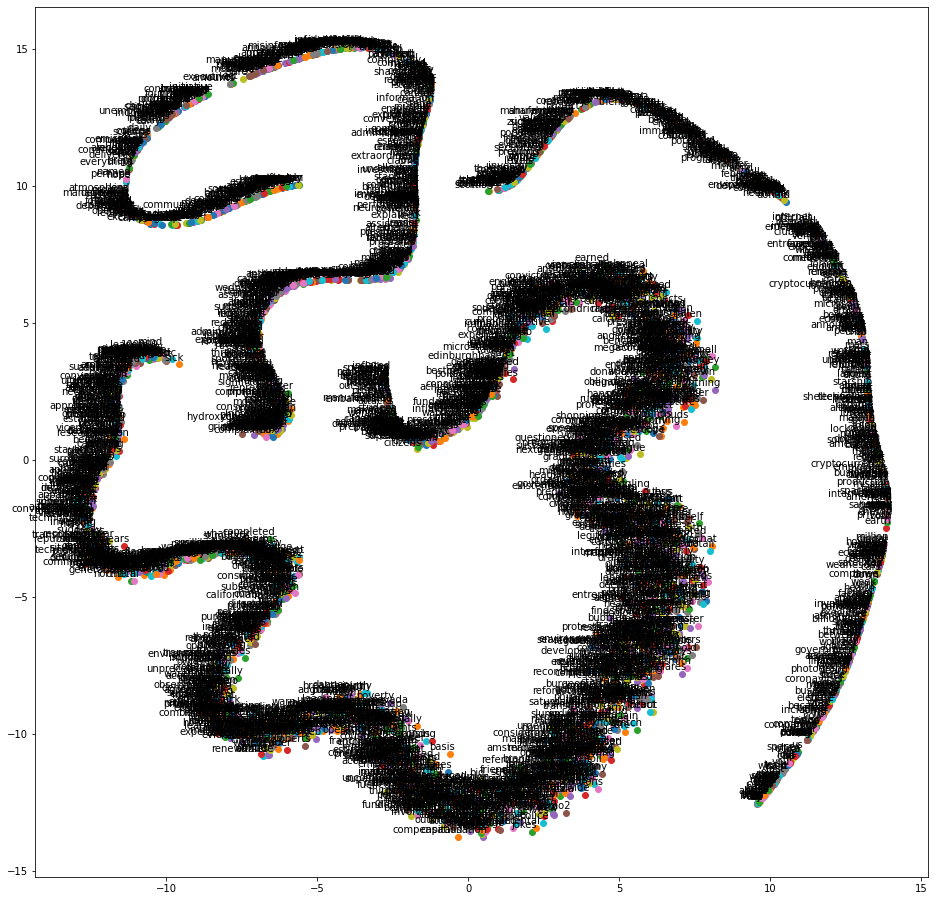

In [125]:
# visualization
# https://habr.com/en/post/267041/
# https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
# https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

labels = []
tokens = []

for word in model.wv.index_to_key:
    tokens.append(model.wv.get_vector(word))
    labels.append(word)

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(tokens)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

x = []
y = []
for value in tsne_results:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(16, 16))
for i in range(len(x)):
    plt.scatter(x[i], y[i])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')

In [8]:
#[len(x) for x in real_data['text']]
#len(real_data['text'][0])
#real_data['text'][0]
#print(real_data['text'].str.len())
#print(sum(real_data['text'].str.len()))

0      4386
1      4087
2      2459
3      1322
4      4191
       ... 
139    4811
140    5313
141    6107
142    4514
143    7229
Name: text, Length: 144, dtype: int64
619393


<AxesSubplot:>

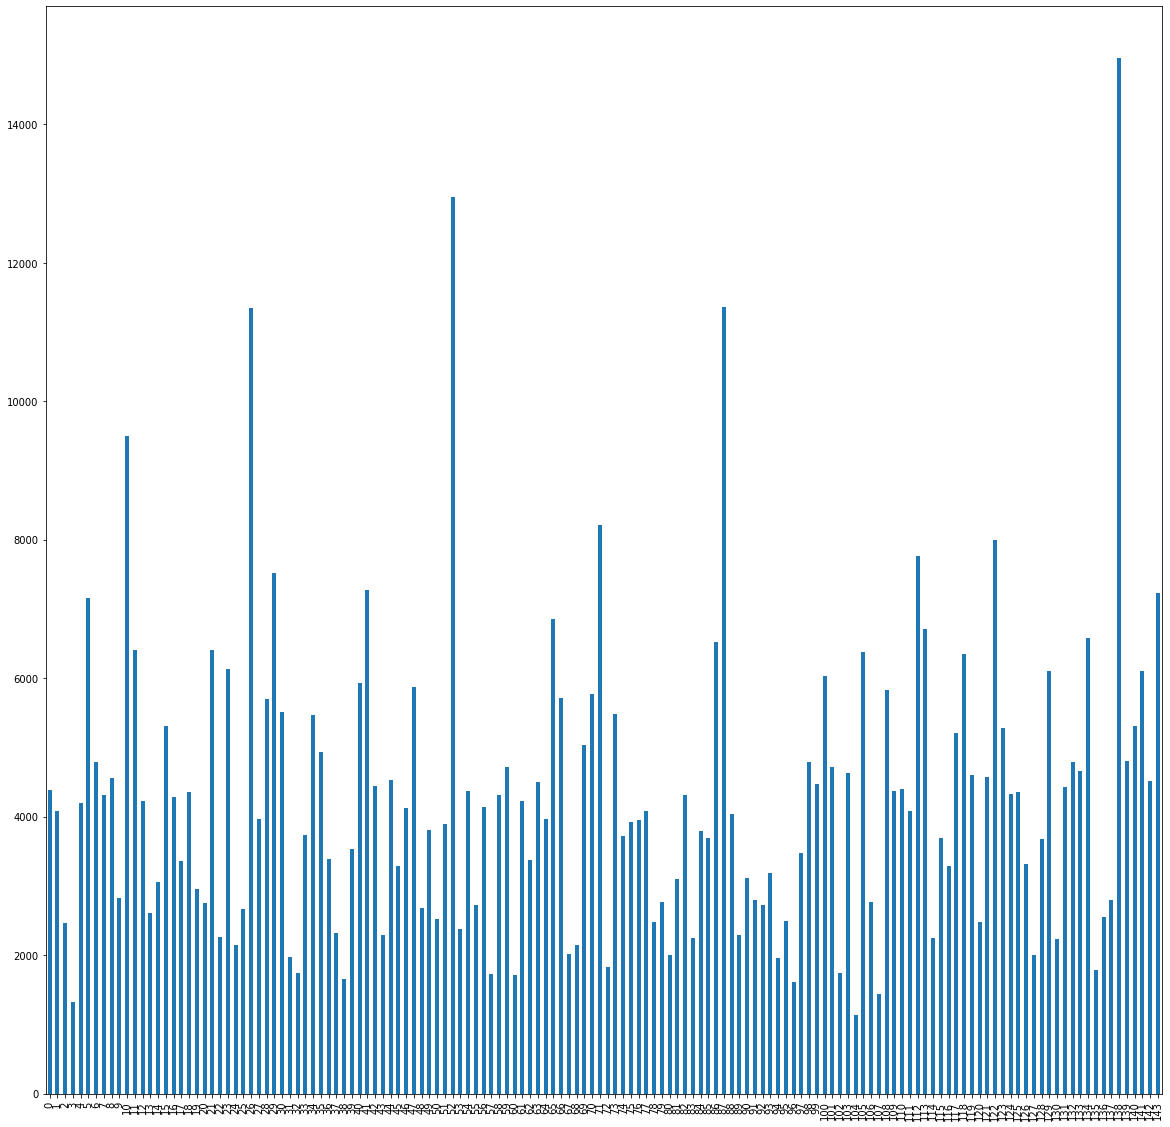

In [126]:
# find the size of vector which covers most cases
import matplotlib.pyplot as plt

# all lines lenght
plt.figure(figsize=(20, 20))
real_data['text'].str.len().plot(kind="bar")

Text(0, 0.5, 'frequency')

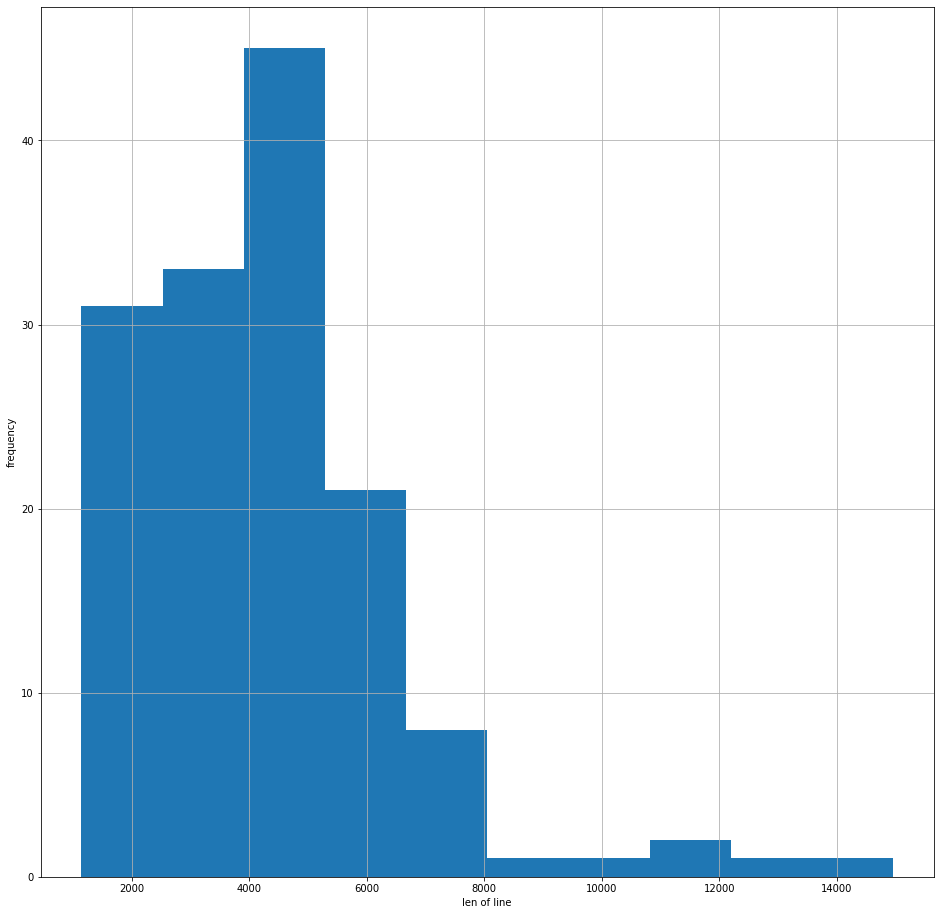

In [127]:
# len frequency
plt.figure(figsize=(16, 16))

ax = real_data['text'].str.len().hist()
ax.set_xlabel("len of line")
ax.set_ylabel("frequency")

In [128]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# matrix heigh (max words count)
# based on plot above
SENTENCE_LENGTH = 8000 
# dict size 
# sum of all words counted above 619393 - how to find NUM
NUM = 100000

def get_sequences(tokenizer, x):
    sequences = tokenizer.texts_to_sequences(x)
    return pad_sequences(sequences, maxlen=SENTENCE_LENGTH)

# create and train tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

# reflect each text into token ids array
x_train_seq = get_sequences(tokenizer, x_train)
x_test_seq = get_sequences(tokenizer, x_test)

In [ ]:
# prepare embedding layer

In [13]:
#from keras.layers import Input
#from keras.layers.embeddings import Embedding

#news_input = Input(shape=(SENTENCE_LENGTH,), dtype='int32')
#news_encoder = Embedding(NUM, 100, input_length=SENTENCE_LENGTH,
#                          weights=[embedding_matrix], trainable=False)(news_input)

NameError: name 'embedding_matrix' is not defined